Implement EM fitting of a mixture of gaussians on the two-dimensional data set points.dat. You should try different numbers of mixtures, as well as tied vs. separate covariance matrices for each gaussian.


IN EITHER CASE Use the final 1/10 of the data for dev. Plot likelihood on train and dev vs iteration for different numbers of mixtures.

In [30]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import math
from IPython.display import set_matplotlib_formats
import matplotlib

# data processing

In [2]:
def multivariate_normal(miu, cov, array):
    z = (-1/2)*((array - miu).dot(np.linalg.inv(cov))).dot((array - miu).T)
    n_f = 1/math.sqrt(np.linalg.det(cov)*(2*math.pi)**cov.shape[0])
    prob = n_f*np.exp(z)
    return prob

In [3]:
file = open('points.dat.txt')
record_collect = []
for line in file:
    record_collect.append(line)
    
x = []
y = []
for i in record_collect:
    record = i.split()
    x.append(record[0])
    y.append(record[1])
    
    
train_x = x[0:900]
dev_x = x[900:]
train_y = y[0:900]
dev_y = y[900:]

# create dataframes for the data
train = pd.DataFrame({'x':train_x,'y':train_y})
dev = pd.DataFrame({'x':dev_x,'y':dev_y})
x = pd.to_numeric( train['x'])
y = pd.to_numeric( train['y'])
# convert data
train = train.apply(pd.to_numeric)
dev = dev.apply(pd.to_numeric)

In [4]:
# covert dataframe into list
train = train.values.tolist()
dev = dev.values.tolist()
x = x.values.tolist()
y = y.values.tolist()

# GMM

In [5]:
#GNN
# n: number of clusters
# data: list that goes into the GMM
# x is the list for column x values
# y is the list for column y values
def GMM (n,train, dev, x, y, cov_type = None):

    # log likely hood for training data
    train_result = []
    # log likely hood for devlopment data
    dev_result = []
    # conter list to array
    train = np.array(train)
    dim = train.shape
    x = np.array(x)
    y = np.array(y)
    cov = []
    pai = []

    # initialization
    x = [min(x), max(x)]
    y = [min(y), max(y)]
    miu = []
    
    for i in range(n):
        x_margin = np.random.uniform(min(x), max(x))
        y_margin = np.random.uniform(min(y), max(y))
        miu.append(np.mean(train, axis=0)+[x_margin, y_margin])
        cov.append(np.cov(train.T))
        pai.append(1/n)

        # EM iteration:
    for iterration in range(40):
        # E step
        r_pro = []
        for i in range(dim[0]):
            r_pro_temp = []
            px = []
            for k in range(n):
                px .append(pai[k]*multivariate_normal(miu[k], cov[k], train[i]))
            
            total_px = sum(px)
            for k in range(n):
                r_pro_temp.extend([px[k]/total_px])
            r_pro.append(r_pro_temp)
        # M step
        NK = []
        r_pro_array = np.array(r_pro)
        miu = []
        for i in range(n):
            NK.append(sum(r_pro_array[:,i]))
            miu.append(1/NK[i]*train.T.dot(r_pro_array[:,i]))
        cov = [np.zeros((2, 2))] * n
        for i in range(dim[0]):
            for k in range(n):
                cov [k] = cov[k] + r_pro_array[i,k] * np.outer((train[i] - miu[k]),(train[i] - miu[k]))
        for i in range(n):
            cov[i] = cov[i]/NK[i]
        
        # the case of Tied cov
        '''
        if cov_type == 'Tied':
            temp = sum(cov)
            for i in range(n):
                cov[i] = temp/n
                pai[i] = [NK[i]/dim[0]]
        '''
        if cov_type == 'Tied':
            cov = [sum(cov)/n for i in range(n)]
        pai = [i/dim[0] for i in NK]        
                
                
                
                
                
                
        # log likely hood on training data
        temp_log_train = 0
        for i in range(dim[0]):
            temp_log_i = 0
            for k in range(n):
                temp_log_i += pai[k]*multivariate_normal(miu[k], cov[k], train[i])
            temp_log_train += np.log(temp_log_i)
        train_result.append(temp_log_train)
        
        
        # log likely hood on development data
        dev = np.array(dev)
        temp_log_dev = 0
        dim_dev = dev.shape
        for i in range(dim_dev[0]):
            temp_log_dev_i = 0
            for k in range(n):
                temp_log_dev_i += pai[k]*multivariate_normal(miu[k], cov[k], dev[i])
            temp_log_dev += np.log(temp_log_dev_i)
        dev_result.append(temp_log_dev)
        

        
    return train_result,dev_result

# Graph

In [14]:
# separate covariance
sep_result_train = []
sep_result_dev = []
for i in range(1,10):
    a,b = GMM (i,train, dev, x, y)
    sep_result_train.append(a)
    sep_result_dev.append(b)

In [15]:
# tied covariance
tie_result_train = []
tie_result_dev = []
for i in range(1,10):
    a,b = GMM (i,train, dev, x, y,cov_type = 'Tied')
    tie_result_train.append(a)
    tie_result_dev.append(b)

# Plotting

In [16]:
x_axe = []
for i in range(40):
    x_axe.append(i)

In [41]:
set_matplotlib_formats('retina')
matplotlib.rcParams['figure.dpi'] = 120

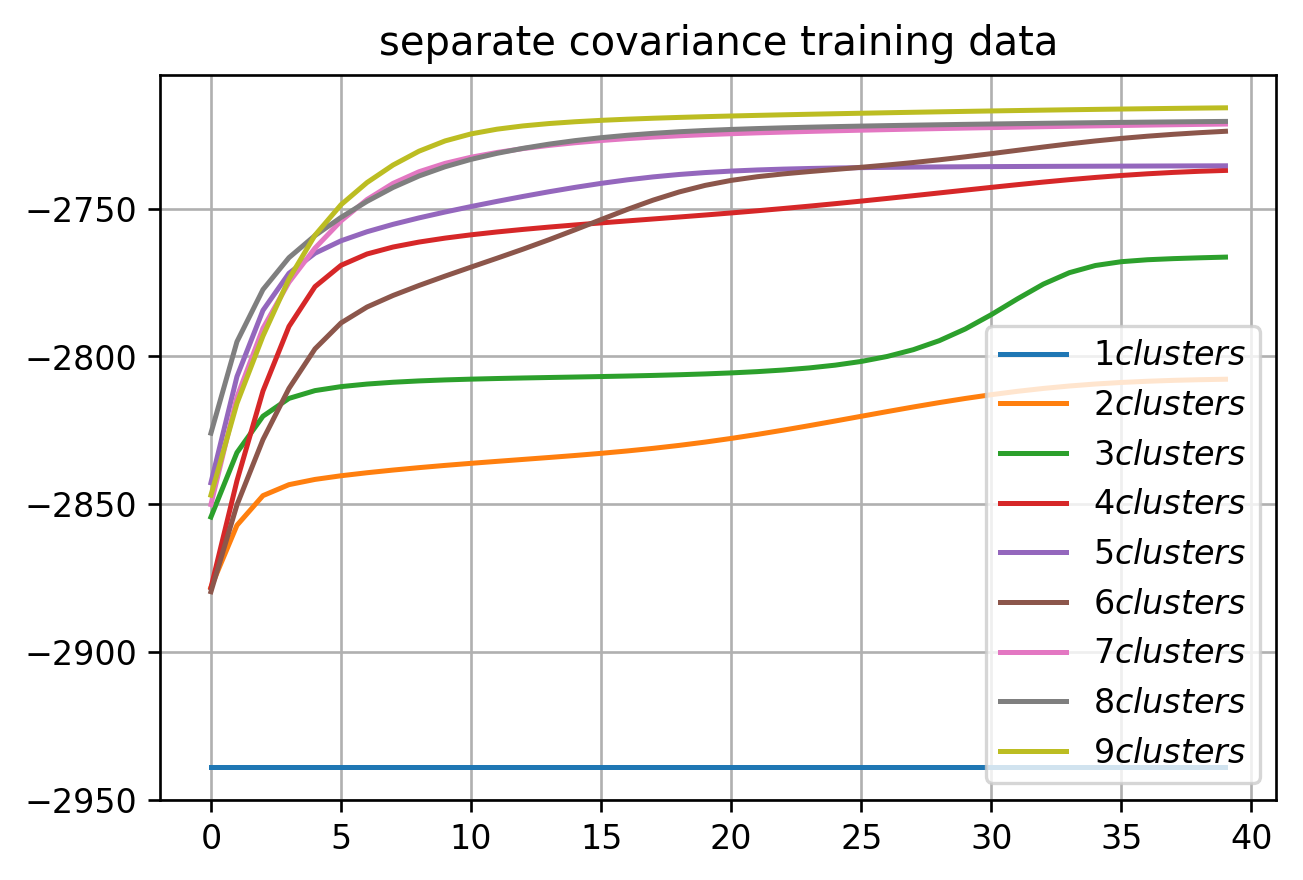

In [46]:

for i in range(9):
    plt.plot(x_axe, sep_result_train[i],label='$ %i clusters$' % (i+1))
plt.title('separate covariance training data')
plt.legend()
plt.grid(True)

plt.show()


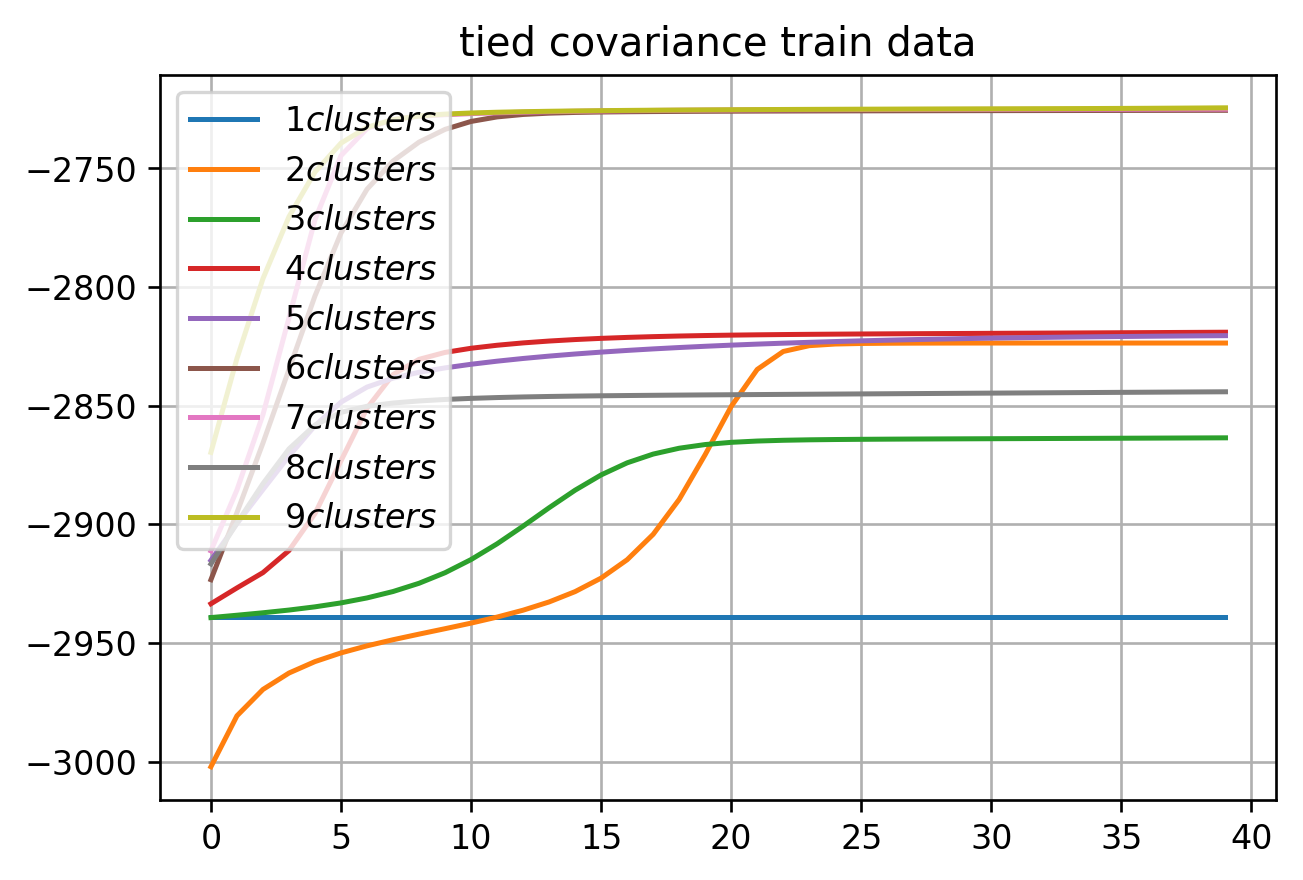

In [50]:


for i in range(9):
    plt.plot(x_axe, tie_result_train[i],label='$ %i clusters$' % (i+1))

plt.title('tied covariance train data')
plt.legend()
plt.grid(True)

plt.show()

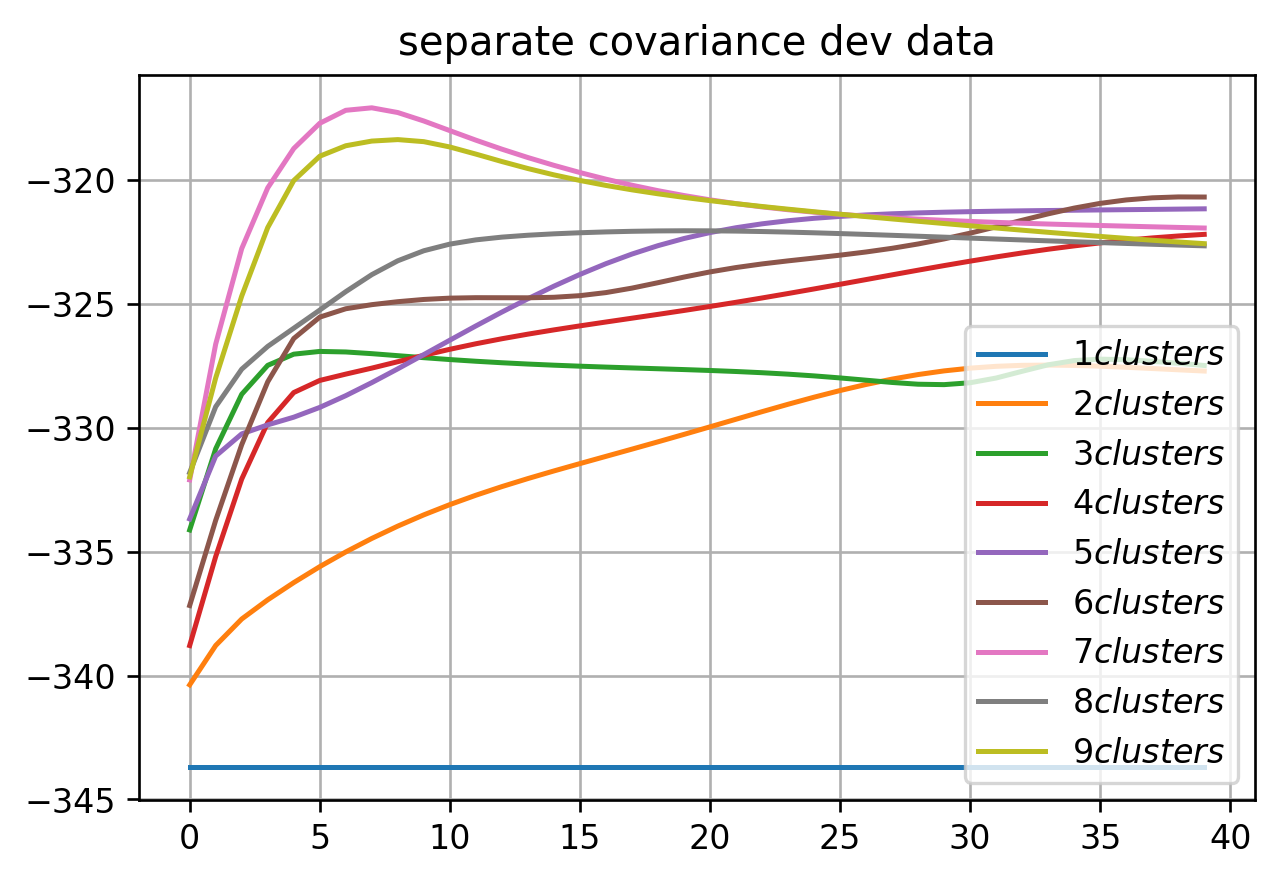

In [48]:

for i in range(9):
    plt.plot(x_axe, sep_result_dev[i],label='$ %i clusters$' % (i+1))

plt.title('separate covariance dev data')
plt.legend()
plt.grid(True)

plt.show()

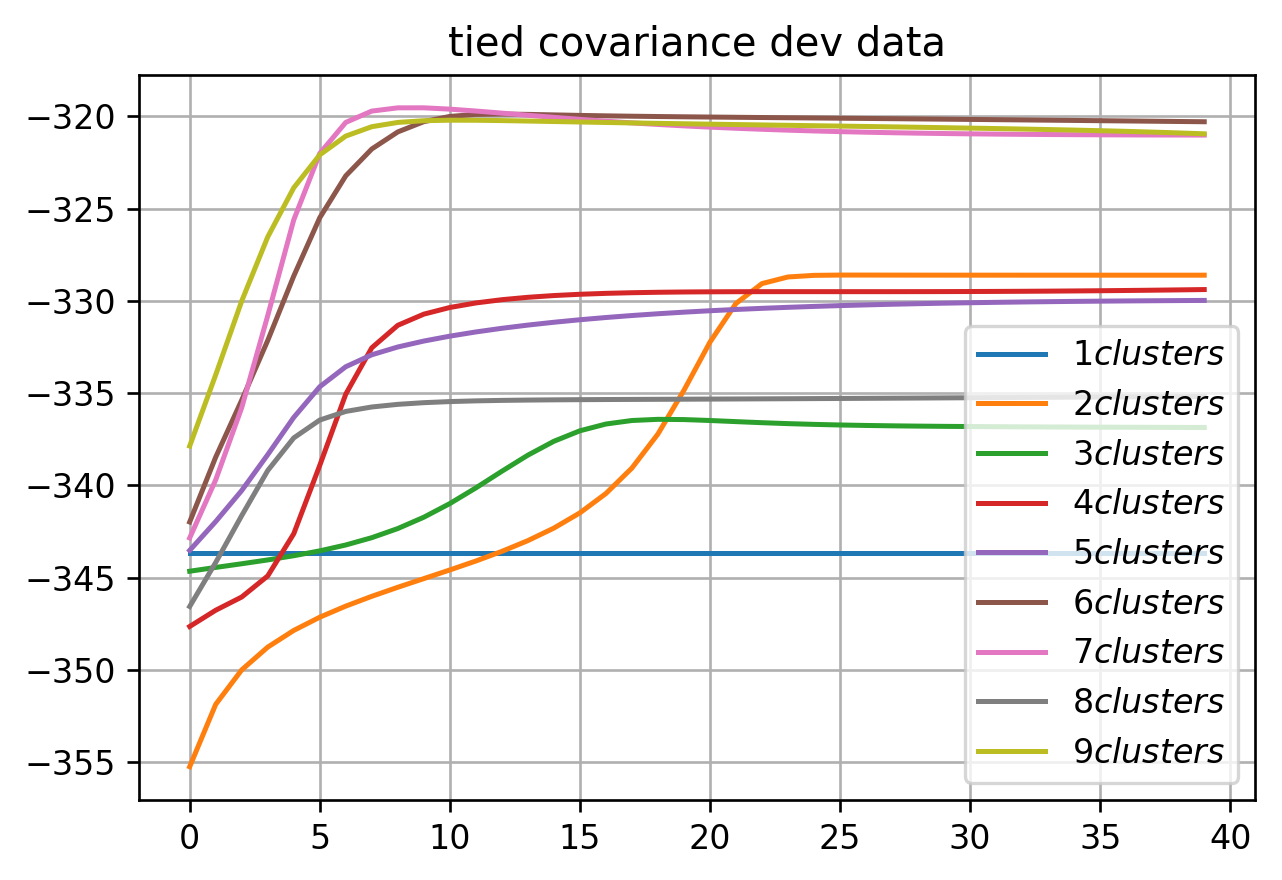

In [49]:
for i in range(9):
    plt.plot(x_axe, tie_result_dev[i],label='$ %i clusters$' % (i+1))
plt.title('tied covariance dev data')
plt.legend()
plt.grid(True)
plt.show()